La verosimiglianza del valore del parametro $\theta=\theta^*$ dato il risultato della variabile random $X$

$$
\mathscr{L}(\theta^*|X) = P(X|\theta=\theta^*) = \frac{P(X|\theta^*)}{P(X)}
$$

$$
\mathrm{LR}(X) = \Lambda(\theta_1 : \theta_2|X) = 
\frac{\mathscr{L}(\theta_1|X)}{\mathscr{L}(\theta_2|X)} = 
\frac{P(X|\theta=\theta_1)}{P(X|\theta=\theta_2)} =
\frac{P(X|\theta_1)}{P(X)} \cdot \frac{P(X)}{P(X|\theta_2)} =
\frac{P(X|\theta_1)}{P(X|\theta_2)}
$$

Il rapporto di verosimiglianza dei due valori del parametro $\theta_1$ e $\theta_2$, dato il risultato della variabile $X$ è pari al rapporto tra le verosimiglianze, ovvero tra le probabilità a posteriori di $X$ dato $\theta^*$.

Dal punto di vista dei test diagnostici qualitativi, il risultato della variabile random $X$ è il risultato del test ($\oplus$ e $\ominus$) e i valori dell parametro $\theta_1$ e $\theta_2$ sono la caratteristica (verità non nota) di avere o non avere la malattia ($M$ e $\overline{M}$).

Si distinguono quindi due likelihood ratios per i test diagnostici: $\mathrm{LR}(\oplus)$ per i testi con risultato positivo e $\mathrm{LR}(\ominus)$ per i test con risultati negativo.

$$
\mathrm{LR}(\oplus) = \Lambda(M:\overline{M}|\oplus) = 
\frac{\mathscr{L}(M|\oplus)}{\mathscr{L}(\overline{M}|\oplus)} =
\frac{P(\oplus|m=M)}{P(\oplus|m=\overline{M})} =
\frac{P(\oplus|M)}{P(\oplus)} \cdot \frac{P(\oplus)}{P(\oplus|\overline{M})} = 
\frac{P(\oplus|M)}{P(\oplus|\overline{M})} =
\frac{P(T_{\oplus})}{P(F_{\oplus})} = \frac{\mathbf{SE}}{1 - \mathbf{SP}}
$$

$$
\mathrm{LR}(\ominus) = \Lambda(M:\overline{M}|\ominus) = 
\frac{\mathscr{L}(M|\ominus)}{\mathscr{L}(\overline{M}|\ominus)} =
\frac{P(\ominus|m=M)}{P(\ominus|m=\overline{M})} =
\frac{P(\ominus|M)}{P(\ominus)} \cdot \frac{P(\ominus)}{P(\ominus|\overline{M})} =
\frac{P(\ominus|M)}{P(\ominus|\overline{M})} = 
\frac{P(F_{\ominus})}{P(T_{\ominus})} = \frac{1 - \mathbf{SE}}{\mathbf{SP}}
$$

Dunque:

- $\mathrm{LR}(\oplus)$ può essere interpretato come il rapporto tra la probabilità di _veri positivi_ e di _falsi positivi_
- $\mathrm{LR}(\ominus)$ può essere interpretato come il rapporto tra la probabilità di _falsi negativi_ e di _veri negativi_

$$
\mathbf{VPP} = P(M|\oplus) = 
\mathscr{L}(M|\oplus) \cdot P(M) = 
P(\oplus|m=M) \cdot P(M) =
\frac{P(\oplus|M) \cdot P(M)}{P(\oplus)}
$$

$$
\mathbf{VPN} = P(\overline{M}|\ominus) = 
\mathscr{L}(\overline{M}|\ominus) \cdot P(\overline{M}) = 
P(\ominus|m=\overline{M}) \cdot P(\overline{M}) =
\frac{P(\ominus|\overline{M}) \cdot P(\overline{M})}{P(\ominus)}
$$

Odds

$$
O = \frac{P}{\overline{P}} = \frac{P}{1-P}
$$

$$
P = \frac{O}{1+O}
$$

Per malattia $M$ e test o segno/sintomo $\odot$

$$
O(M) = \frac{P(M)}{P(\overline{M})} = \frac{P(M)}{1-P(M)}
$$

$$
O(M|\odot) = \frac{P(M|\odot)}{P(\overline{M}|\odot)} = \frac{P(M|\odot)}{1-P(M|\odot)}
$$

$$
O(M|\odot) = O(M) \cdot \mathrm{LR}(\odot)
$$

$$
\mathrm{LR}(\odot) = \frac{O(M|\odot)}{O(M)} = 
\frac{P(M|\odot)}{1-P(M|\odot)} \cdot \frac{1-P(M)}{P(M)}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from pynomo.nomographer import *
from IPython.display import clear_output

In [129]:
Results = []
PM = np.linspace(0, 1, 101)  # vettore probabilità a priori
SS = np.linspace(0, 1, 101)  # vettore sensibilità e specificità

for se, sp, in itertools.permutations(SS, 2):
    # Vettore probabilità a posteriori {0..1}
    PMp = (se * PM) / (se * PM + (1 - sp) * (1 - PM))
    PMn = (sp * (1-PM)) / (sp*(1-PM) + (1-se)*PM)
    PM50 = PM[50]
    PMp50 = PMp[50]
    PMn50 = PMn[50]
    # LR calcolato da Odds
    LR = (PMp50*(1-PM50))/(PM50*(1-PMp50))
    LRn = (PMn50*(1-PM50))/(PM50*(1-PMn50))
    Results.append({
        "SE": se, "SP": sp,
        "PMp": PMp, "LR": LR,
        "PMn": PMn, "LRn": LRn
    })
clear_output()

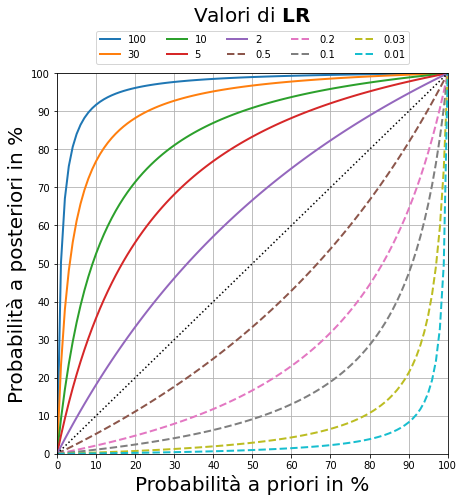

In [113]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

for LRs in [100, 30, 10, 5, 2, .5, .2, .1, .03, .01]:
    for Result in Results:
        if np.isclose(Result["LR"], LRs):
            ax.plot(
                PM, Result["PMp"], 
                label=LRs, ls="-" if LRs>1 else "--",
                lw=2)
            break

ax.plot([0,1], [0,1], c="k", ls=":")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.125), ncol=5)

ax.set_xlabel("Probabilità a priori in %", fontsize=20)
ax.set_xticks(np.arange(0, 1.1, .1))
ax.set_xticklabels(np.arange(0, 101, 10))
ax.set_ylabel("Probabilità a posteriori in %", fontsize=20)
ax.set_yticks(np.arange(0, 1.1, .1))
ax.set_yticklabels(np.arange(0, 101, 10))

ax.set_title("Valori di $\mathbf{LR}$", y=1.12, fontsize=20)
ax.grid()

plt.show();

In [165]:
ticks = {}
ticks.update({(i+1)/10:f"{(i+1)*10}" for i in range(9)})
ticks.update({.01:"1", .02:"2", .03:"3", .05:"5"})
ticks.update({.001:"0.1", .002:"0.2", .003:"0.3", .005:"0.5"})
ticks.update({.99:"99", .98:"98", .97:"97", .95:"95"})
ticks.update({.999:"99.9", .998:"99.8", .997:"99.7", .995:"99.5"})

dist_SI = {
    'u_min': .001,
    'u_max': .999,
    'function': lambda u: np.log((u)/(1-u)),
    'title': r"Probabilita' pre-test",
    'title_draw_center': True,
    'title_opposite_tick': False,
    'title_distance_center': 1.2,
    'tick_levels': 4,
    'tick_text_levels': 2,
    'scale_type': 'manual line',
    'tick_side': 'left',
    'manual_axis_data': ticks,
    
}

eff_SI = {
    'u_min': .001,
    'u_max': 1000,
    'function': lambda u: np.log(u),
    'title': r'LR',
    'tick_levels': 2,
    'tick_text_levels': 1,
    'scale_type': 'log',
    'tick_side': 'right',
    'extra_params': [{
        'u_min': .001,
        'u_max': 1000,
        'tick_side': 'left',
    },],
}

fuel_SI = {
    'u_min': .001,
    'u_max': .999,
    'function': lambda u: np.log((1-u)/(u)),
    'title': r"Probabilita' post-test",
    'title_draw_center': True,
    'title_opposite_tick': False,
    'title_distance_center': 1.2,
    'tick_levels': 3,
    'tick_text_levels': 2,
    'scale_type': 'manual line',
    'tick_side': 'right',
    'manual_axis_data': ticks,
}

block_SI = {
    'block_type': 'type_1',
    'f1_params': dist_SI,
    'f2_params': eff_SI,
    'f3_params': fuel_SI,
    'isopleth_values':[
        [.02,100,'x'],
        #[.13,90,'x'],
        #[.3,100,'x'],
        #[.01,10,'x'],
    ]
}

main_params = {
    'filename': 'fagan',
    'paper_height':12.0,
    'paper_width':7.0,
    'block_params': [block_SI],
    'transformations': [
        ('scale paper',)
    ],
    'title_str': r'NOMOGRAMMA DI FAGAN',
}
Nomographer(main_params);

In [121]:
x = np.arange(.1, 1, .1)
xa = np.arange(.08, 0, -.02)
xb = np.arange(.01, 0, -.002)
xc = np.arange(.92, 1, +.02)
xd = np.arange(.99, 1, +.002)

y1 = x/(1-x)
y1a = xa/(1-xa)
y1b = xb/(1-xb)
y1c = xc/(1-xc)
y1d = xd/(1-xd)
y2 = y1[::-1]
y2a = y1a[::-1]

/Users/massimopierini/opt/anaconda3/envs/covid/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


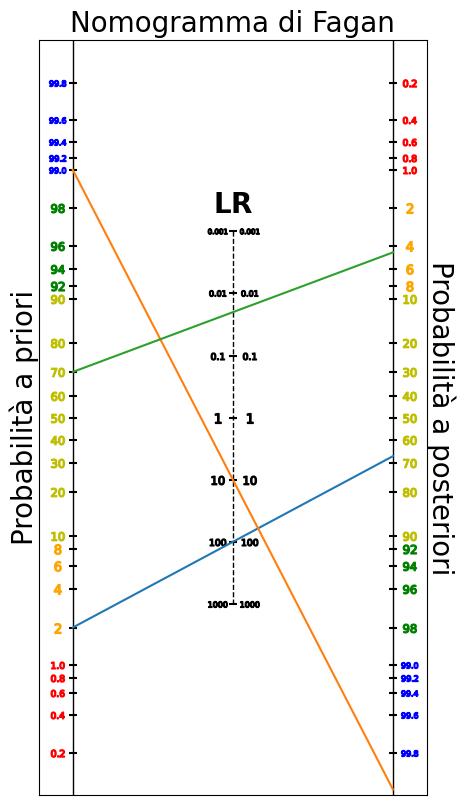

In [227]:
fig, ax = plt.subplots(figsize=(5,10), dpi=100)

# 10 .. 90
ax.scatter([-1 for _ in range(len(x))], np.log(y1), marker="_", c="k")
for i, _x in enumerate(x):
    ax.scatter([-1.1], np.log(y1[i]), marker=f"${_x:.0%}$", s=100, c="y")
# 2 .. 8
ax.scatter([-1 for _ in range(len(xa))], np.log(y1a), marker="_", c="k")
for i, _xa in enumerate(xa):
    ax.scatter([-1.1], np.log(y1a[i]), marker=f"${_xa:.0%}$", s=50, c="orange")
# 0.2 .. 1.0
ax.scatter([-1 for _ in range(len(xb))], np.log(y1b), marker="_", c="k")
for i, _xb in enumerate(xb):
    ax.scatter([-1.1], np.log(y1b[i]), marker=f"${_xb:.1%}$", s=100, c="r")
# 92 ..98
ax.scatter([-1 for _ in range(len(xc))], np.log(y1c), marker="_", c="k")
for i, _xc in enumerate(xc):
    ax.scatter([-1.1], np.log(y1c[i]), marker=f"${_xc:.0%}$", s=100, c="g")
# 99 ..99.8
ax.scatter([-1 for _ in range(len(xd))], np.log(y1d), marker="_", c="k")
for i, _xd in enumerate(xd):
    ax.scatter([-1.1], np.log(y1d[i]), marker=f"${_xd:.1%}$", s=150, c="b")
    
ax.scatter([+1 for _ in range(len(x))], np.log(y2), marker="_", c="k")
for i, _x in enumerate(x):
    ax.scatter([+1.1], np.log(y2[i]), marker=f"${_x:.0%}$", s=100, c="y")
ax.scatter([+1 for _ in range(len(xa))], np.log(y1a), marker="_", c="k")
for i, _xa in enumerate(xa):
    ax.scatter([+1.1], np.log(y1a[i]), marker=f"${1-_xa:.0%}$", s=100, c="g")
ax.scatter([+1 for _ in range(len(xb))], np.log(y1b), marker="_", c="k")
for i, _xb in enumerate(xb):
    ax.scatter([+1.1], np.log(y1b[i]), marker=f"${1-_xb:.1%}$", s=150, c="b")
# 92 ..98
ax.scatter([+1 for _ in range(len(xc))], np.log(y1c), marker="_", c="k")
for i, _xc in enumerate(xc):
    ax.scatter([+1.1], np.log(y1c[i]), marker=f"${1-_xc:.0%}$", s=50, c="orange")
# 99 ..99.8
ax.scatter([+1 for _ in range(len(xd))], np.log(y1d), marker="_", c="k")
for i, _xd in enumerate(xd):
    ax.scatter([+1.1], np.log(y1d[i]), marker=f"${1-_xd:.1%}$", s=100, c="r")

Ops = []
for L in [.001, .01, .1, 1, 10, 100, 1000]:
    Op = 1 / (np.sqrt(L) + 1)
    Ops.append(Op)
    ax.scatter(0, np.log(Op/(1-Op)), marker="_", c="k")
    ax.scatter(+.1, np.log(Op/(1-Op)), marker=f"${L}$", s=(abs(np.log10(L))+1)*50, c="k")
    ax.scatter(-.1, np.log(Op/(1-Op)), marker=f"${L}$", s=(abs(np.log10(L))+1)*50, c="k")
    
ax.plot([0,0], [np.log(Ops[0]/(1-Ops[0])), np.log(Ops[-1]/(1-Ops[-1]))], lw=1, ls="--", c="k")
ax.axvline(-1, ls="-", lw=1, c="k")
ax.axvline(+1, ls="-", lw=1, c="k")
ax.set_ylim(-7, 7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Nomogramma di Fagan", fontsize=20)
ax.text(-1.3, 0, "Probabilità a priori", ha="center", va="center", fontsize=20, rotation=90)
ax.text(+1.3, 0, "Probabilità a posteriori", ha="center", va="center", fontsize=20, rotation=270)
ax.text(0, np.log(Ops[0]/(1-Ops[0]))+.5, "$\mathbf{LR}$", ha="center", va="center", fontsize=20)

# Esempio P(M)=2%=0.02 e LR=100
ax.plot(
    [-1, 1],
    [np.log(.02/(1-.02)), np.log((1-.02)/(.02*100))]
)
# Esempio P(M)=99%=0.99 e LR=10
ax.plot(
    [-1, 1],
    [np.log(.99/(1-.99)), np.log((1-.99)/.99/10)]
)
# Esempio P(M)=70%=0.7 e LR=.02
ax.plot(
    [-1, 1],
    [np.log(.7/(1-.7)), np.log((1-.7)/.7/.02)]
)